## Initialization

In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Newton-Raphson Implement

$$
f([x, y]) := [x^2 + 2xy -y^3 + 1, \  x^4 -y^5-2]
$$
We are searching root of $(x,y)$, when $f([x,y])=[0,0]$  
Using Jacobian
$$
J_f ([x,y]) = \begin{bmatrix}
2 x + 2 y & 2 x - 3 y^2 \\
4 x^3 & -5 y^4
\end{bmatrix}
$$
going to Apply Newton-Raphson method

In [30]:
def func(position):
    x, y = position
    
    return [x**2 + 2 * x * y - y**3 + 1,
            x**4 - y**5 -2]
    
def jacobian(position):
    x, y = position
    
    return np.array([[2 * x + 2 * y, 2 * x - 3 * y**2],
            [4 * x**3, -5 * y**4]])

Newton-Raphson

In [31]:
def newton(position_initial, error, iterations_max):
    positions = [position_initial]
    values = func(positions[-1])

    iterations = 0

    while (((abs(values[0]) > error) or (abs(values[1]) > error))
           and (iterations < iterations_max)):
        position_new = positions[-1] - np.linalg.pinv(jacobian(positions[-1])) @ values
        positions.append(position_new)
        values = func(positions[-1])
        
        iterations += 1
        
    return positions, iterations

applying to mutiple range

In [32]:
for x in range(-5, 11, 5):
    for y in range(-5, 11, 5):
        positions, iterations = newton(np.array([x, y]), 1e-10, 1e5)
        print(f"{(x,y)} -> {positions[-1]}\titerations: {iterations}")

(-5, -5) -> [8.25502037 5.41174224]	iterations: 25
(-5, 0) -> [-1.23766188  0.80895379]	iterations: 9
(-5, 5) -> [-1.23766188  0.80895379]	iterations: 14
(-5, 10) -> [8.25502037 5.41174224]	iterations: 11
(0, -5) -> [8.25502037 5.41174224]	iterations: 64
(0, 0) -> [0. 0.]	iterations: 100000
(0, 5) -> [-1.23766188  0.80895379]	iterations: 13
(0, 10) -> [8.25502037 5.41174224]	iterations: 10
(5, -5) -> [-1.23766188  0.80895379]	iterations: 140
(5, 0) -> [-1.23766188  0.80895379]	iterations: 60
(5, 5) -> [-1.23766188  0.80895379]	iterations: 15
(5, 10) -> [8.25502037 5.41174224]	iterations: 9
(10, -5) -> [8.25502037 5.41174224]	iterations: 38
(10, 0) -> [8.25502037 5.41174224]	iterations: 15
(10, 5) -> [8.25502037 5.41174224]	iterations: 5
(10, 10) -> [8.25502037 5.41174224]	iterations: 10


## Visualization

In [33]:
def plot_ratios(positions):
    ratios = []
    for i in range(len(positions) - 1):
        ratios.append(np.linalg.norm(positions[i + 1]) / np.linalg.norm(positions[i]))
    plt.plot(ratios)
    plt.show()

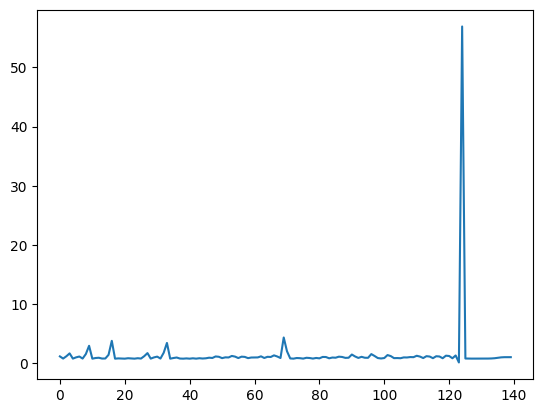

In [38]:
plot_ratios(newton(np.array([5, -5]), 1e-10, 1e5)[0])

In [35]:
def plot_log_ratios(positions):
    ratios = []
    for i in range(len(positions) - 1):
        ratios.append(np.log10(np.linalg.norm(positions[i + 1]) / np.linalg.norm(positions[i])))
    plt.plot(ratios)
    plt.show()

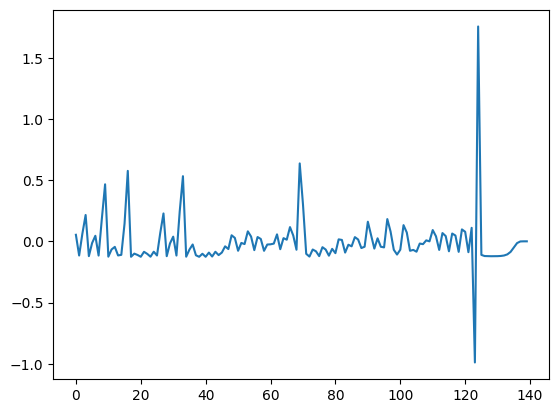

In [37]:
plot_log_ratios(newton(np.array([5, -5]), 1e-10, 1e5)[0])